In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

2024-03-01 13:44:27.083654: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 13:44:27.118716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# paths
source_drawing = "data_site/drawingletter/"
source_webcam = "data_site/webcamletter/"

In [3]:
drawing_pics = os.listdir(source_drawing)
webcam_pics = os.listdir(source_webcam)
webcam_pics, drawing_pics

(['pic0.png', 'picture.png', 'S.png'],
 ['drawing.png',
  'drawing (3).png',
  'drawing (4).png',
  'zdrawing F.png',
  'drawing (2).png',
  'zdrawing M.png',
  'zdrawing P.png'])

In [4]:
def preprocess_webcam_image(image_path, exposure_factor=1.5):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Charger l'image en niveaux de gris
    img = cv2.convertScaleAbs(img, alpha=exposure_factor, beta=0) # Augmenter l'exposition
    img = cv2.bitwise_not(img) # inverser noir blanc
    img = cv2.resize(img, (28, 28)) # Redimensionner l'image
    img = img / 255.0 # Normaliser les valeurs des pixels entre 0 et 1
    return img

In [5]:
full_path = os.path.join(source_webcam, webcam_pics[0])
processed_webcam_imageO = preprocess_webcam_image(full_path)

full_path = os.path.join(source_webcam, webcam_pics[1])
processed_webcam_imageA = preprocess_webcam_image(full_path)

full_path = os.path.join(source_webcam, webcam_pics[2])
processed_webcam_imageS = preprocess_webcam_image(full_path)

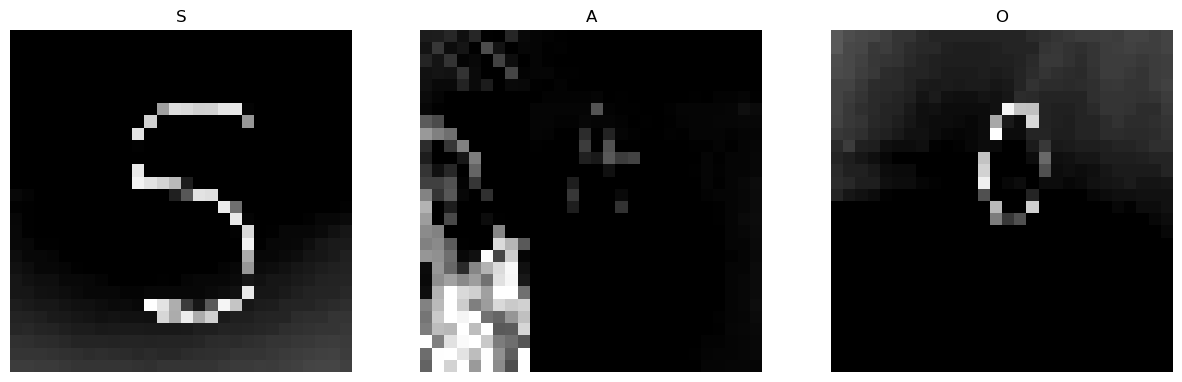

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Afficher les images
axs[0].imshow(processed_webcam_imageS, cmap=plt.get_cmap('gray'))
axs[0].set_title('S')
axs[0].axis('off')

axs[1].imshow(processed_webcam_imageA, cmap=plt.get_cmap('gray'))
axs[1].set_title('A')
axs[1].axis('off')

axs[2].imshow(processed_webcam_imageO, cmap=plt.get_cmap('gray'))
axs[2].set_title('O')
axs[2].axis('off')

plt.show()

In [7]:
def preprocess_drawing(image_path):
    img= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    return img

In [8]:
full_path = os.path.join(source_drawing, drawing_pics[0])
processed_drawing_imageB = preprocess_drawing(full_path)
full_path = os.path.join(source_drawing, drawing_pics[1])
processed_drawing_imageS = preprocess_drawing(full_path)
full_path = os.path.join(source_drawing, drawing_pics[2])
processed_drawing_imageC = preprocess_drawing(full_path)
full_path = os.path.join(source_drawing, drawing_pics[3])
processed_drawing_imageF = preprocess_drawing(full_path)
full_path = os.path.join(source_drawing, drawing_pics[4])
processed_drawing_imageE = preprocess_drawing(full_path)
full_path = os.path.join(source_drawing, drawing_pics[5])
processed_drawing_imageM = preprocess_drawing(full_path)
full_path = os.path.join(source_drawing, drawing_pics[6])
processed_drawing_imageP = preprocess_drawing(full_path)

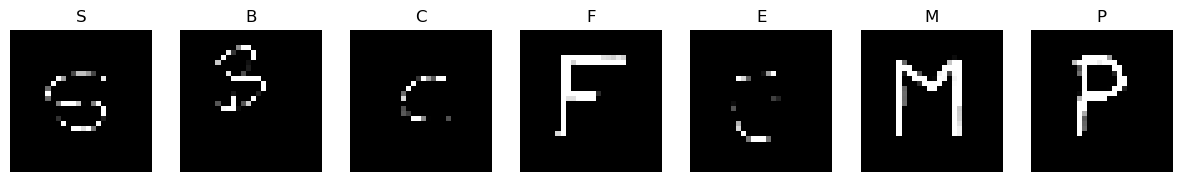

In [9]:
fig, axs = plt.subplots(1, 7, figsize=(15, 5))

# Liste des images prétraitées et leurs titres correspondants
images = [processed_drawing_imageS, processed_drawing_imageB, processed_drawing_imageC, 
          processed_drawing_imageF, processed_drawing_imageE, processed_drawing_imageM,
          processed_drawing_imageP]
titles = ['S', 'B', 'C', 'F', 'E', 'M', 'P']

# Afficher les images
for i in range(7):
    axs[i].imshow(images[i], cmap=plt.get_cmap('gray'))
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.show()

In [10]:
model = load_model('prediction_letter.keras')

2024-03-01 13:44:29.296692: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


In [11]:
alphabet_list = ['NotALetter', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [12]:
def prediction(processed_img):
    test_data = processed_img.reshape(1, 28, 28)
    plt.plot()
    plt.imshow(processed_img, cmap=plt.get_cmap('gray'))
    predictions =model.predict(test_data)
    prediction = np.argmax(predictions)
    plt.show()
    print(f'le modèle prédit: {alphabet_list[prediction]}')

1/1 [==============================] - 0s 95ms/step


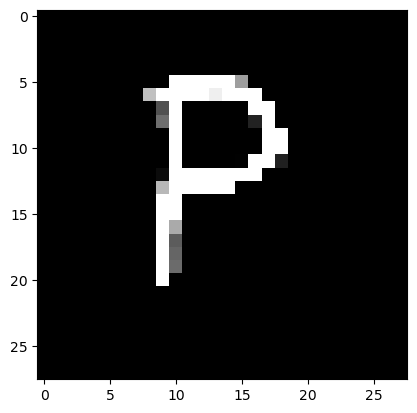

le modèle prédit: P


In [13]:
prediction(processed_drawing_imageP)

1/1 [==============================] - 0s 20ms/step


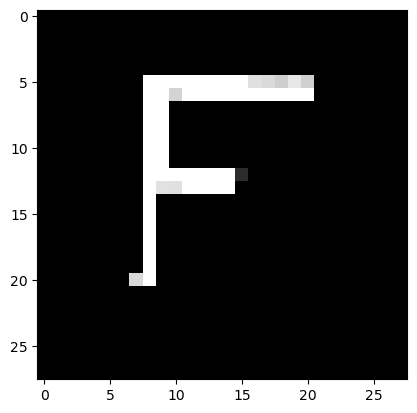

le modèle prédit: F


In [14]:
prediction(processed_drawing_imageF)

1/1 [==============================] - 0s 19ms/step


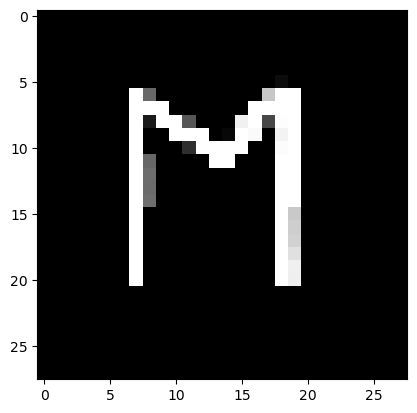

le modèle prédit: M


In [15]:
prediction(processed_drawing_imageM)

1/1 [==============================] - 0s 22ms/step


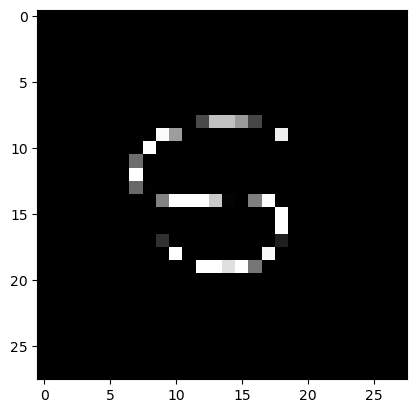

le modèle prédit: S


In [16]:
prediction(processed_drawing_imageS)

1/1 [==============================] - 0s 20ms/step


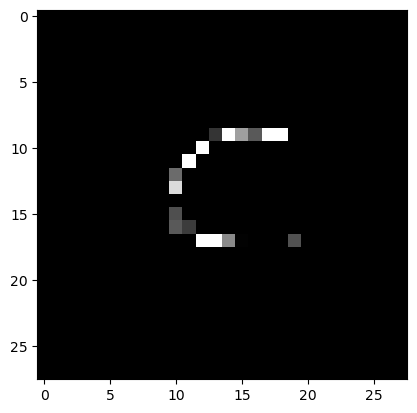

le modèle prédit: J


In [17]:
prediction(processed_drawing_imageC)

1/1 [==============================] - 0s 22ms/step


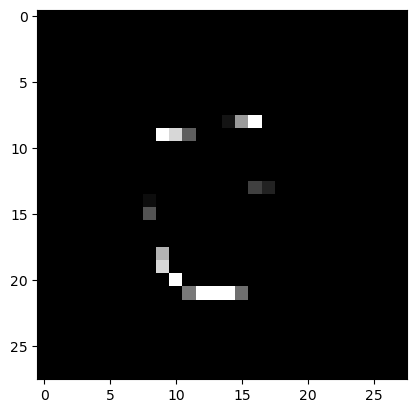

le modèle prédit: J


In [18]:
prediction(processed_drawing_imageE)

1/1 [==============================] - 0s 20ms/step


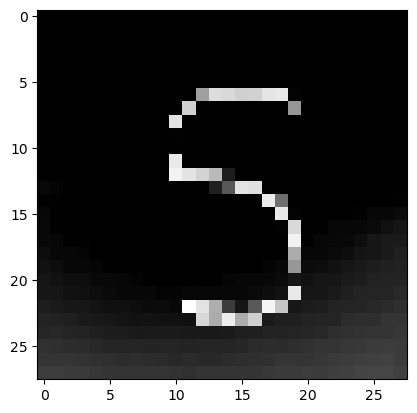

le modèle prédit: J


In [19]:
prediction(processed_webcam_imageS)

1/1 [==============================] - 0s 19ms/step


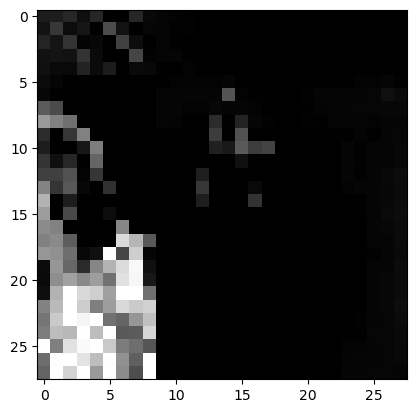

le modèle prédit: J


In [20]:
prediction(processed_webcam_imageA)

1/1 [==============================] - 0s 19ms/step


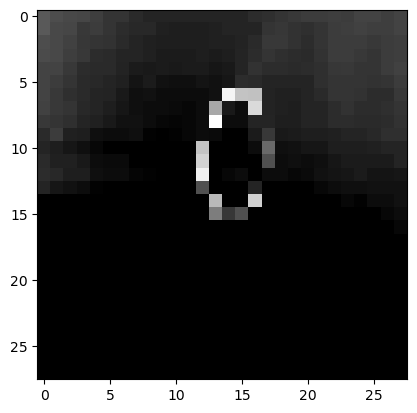

le modèle prédit: I


In [21]:
prediction(processed_webcam_imageO)